# Introduction

Youtube videos are generated by various companies like Apple, Bed, Bath & Beyond, Best Buy as well media corporations like CNN, Disney, BBC and Hulu also offers their materials via Youtube as part of the youtube partnership program.

The data used in this report can be found - https://www.kaggle.com/datasnaek/youtube-new/
Website says that this was last updated on May 2019; however the latest publish date in the data in 2018/06/14
Review Collection Year of Data column:https://www.kaggle.com/mohitmanjaria/youtube-video-trending-eda-and-nlp/edit

# Description
The dataset includes data gathered from 40949 videos on YouTube that are contained within the trending category each day.

There are two kinds of data files, one includes comments (JSON) and one includes video statistics (CSV). They are linked by the unique video_id field.

The columns in the video file are:
1. title
2. channel_title
3. video_id(Unique id of each video)
4. trending_date
5. title
6. channel_title
7. category_id (Can be looked up using the included JSON file)
8. publish_time
9. tags (Separated by | character, [none] is displayed if there are no tags)
10. views
11. likes
12. dislikes
13. comment_count
14. thumbnail_link
15. comments_disabled
16. ratings_disabled
17. video_error_or_removed
18. description

# Data Preparation

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import json
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import math
from PIL import Image

In [2]:
og = pd.read_csv("../input/youtube-new/USvideos.csv")
df = og.copy()
with open("../input/youtube-new/US_category_id.json") as category:
    category = json.load(category)
    
#Extract the category information from the JSON File
vid_cat = []
cat_id = []

for i in category['items']:
    vid_cat.append(i['snippet']['title'])
    cat_id.append(int(i['id']))
    
#Mapping the category_id
df.category_id = og.category_id.map(dict(zip(cat_id,vid_cat)))
df.category_id.isnull().sum()#we have no nan values

0

In [3]:

##Prepare data type columns
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], infer_datetime_format=True)

##Add column for publish time
df['publish_date'] = df['publish_time'].dt.date
df['publish_wd'] = df['publish_time'].dt.weekday
df['publish_hr'] = df['publish_time'].dt.hour
df['publish_time'] = df['publish_time'].dt.time

df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_wd,publish_hr
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,0,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,0,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,6,19
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,0,11
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,6,18


In [4]:
#Dropping some columns and removing duplicates
df = df.drop(['tags', 'video_error_or_removed', 'description'],axis = 1)
df = df.drop_duplicates(keep = 'first')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   video_id           40901 non-null  object        
 1   trending_date      40901 non-null  datetime64[ns]
 2   title              40901 non-null  object        
 3   channel_title      40901 non-null  object        
 4   category_id        40901 non-null  object        
 5   publish_time       40901 non-null  object        
 6   views              40901 non-null  int64         
 7   likes              40901 non-null  int64         
 8   dislikes           40901 non-null  int64         
 9   comment_count      40901 non-null  int64         
 10  thumbnail_link     40901 non-null  object        
 11  comments_disabled  40901 non-null  bool          
 12  ratings_disabled   40901 non-null  bool          
 13  publish_date       40901 non-null  object        
 14  publis

# **Data Exploration**

**First Let's look at how many views are associated with each category**

This number is important, since it tells us about popularity of video. How can we utilize this piece of information? If you are a Youtuber, it is quite straight forward: the more views, which usually implies the more popular your channel is, the more money you can make from ads. If you are in marketing team, knowing what type of video people watch the most would help your advertising plan be more effective. Politicians, producers, media companies are other examples who can deploy this information. It is about how to spread out what you want to convey as quick as possible.

<IPython.core.display.Javascript object>


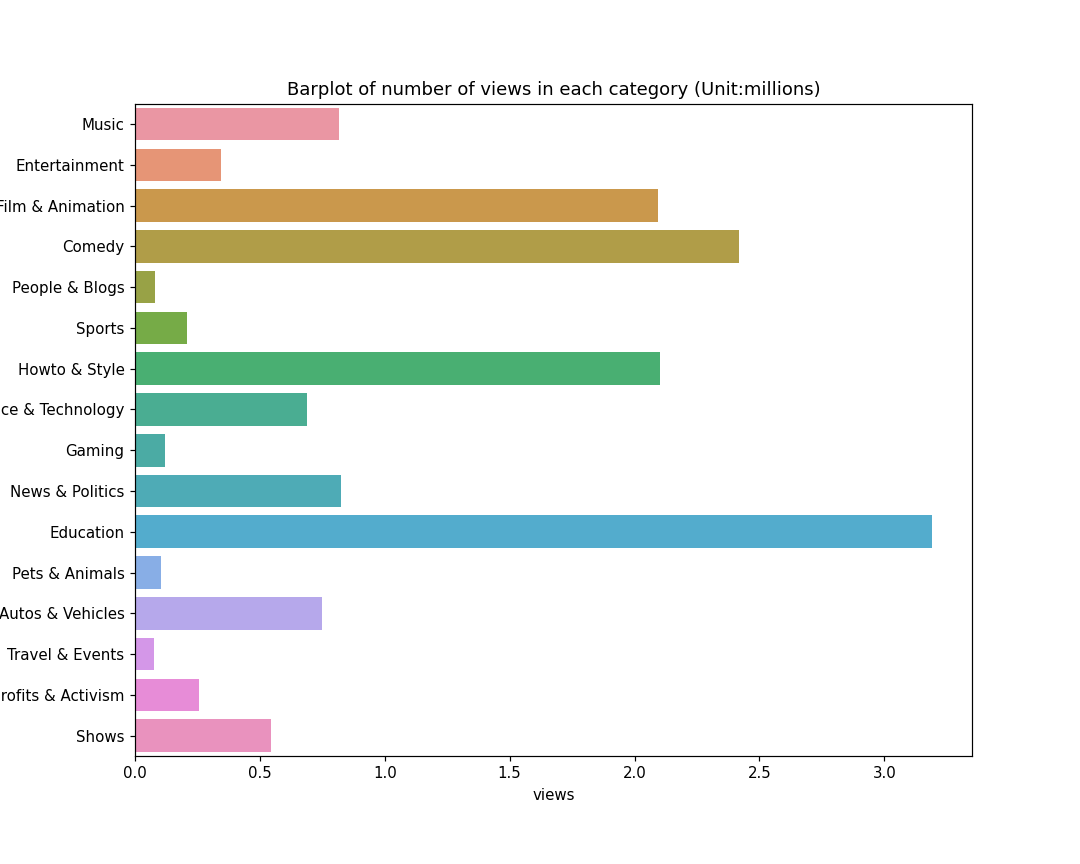

Text(0.5, 0, 'views')

In [6]:
dff = df[['category_id', 'views']].groupby('category_id').aggregate(np.sum).reset_index()\
.sort_values(by='views', ascending=False)
dff.views = df.views/10**6
plt.figure(figsize=(10,8))
view_box = sns.barplot(x='views', y='category_id',data=dff, orient='h')
plt.title('Barplot of number of views in each category (Unit:millions)')
plt.ylabel('Category')
plt.xlabel('views')
#view_box.set_xticklabels(view_box.get_xticklabels(), rotation=45, horizontalalignment='right')

# What we discovered:
Education, Film&Animation, and comedy are what Americans watch the most, which may not be remarkably surprising, but having a look at real data is apparently much better than a mere guess.

# Relationship between number of likes and Views
I believe view count is very important, how about number of likes? Being able to make someone willing to double-tap on that thumbs-up button may be more crucial than just getting as many views as possible. However, logically these numbers should vary together. Although, number of dislikes is in question. Would the dislike count vary together with number of views too? Or if a video is popular, it gets less dislikes?

In [7]:
print(df[['views', 'likes']].corr())
print(df[['views', 'dislikes']].corr())

          views     likes
views  1.000000  0.849179
likes  0.849179  1.000000
             views  dislikes
views     1.000000  0.472216
dislikes  0.472216  1.000000


What we discovered:
1. The correlation between the view and like count is 0.85, very high, which confirms our thoughts. If your video can attract a lot of viewers(high view count).
2. The correlation between the view count and dislike count is 0.47, implying that the dislike count would vary together with the view count too. In other words, popularity does not equate high content quality/positive viewer reaction. we will look more into this in the following part.

# Publish Date
* What day of the week should i publish my video, you might ask? Does it really matter? 
* Isn't if my video has really good content, the number of views will eventually increase? 
* It is not quite that simple. How important is it to choose a right day, at the right time to post your video?
I strongly believe that Time is the key point. If your video can get a strong burst of views in the first three days after it comes out, and if its content is excellent, it will get onto the trending list faster. Once your video appears on the trending list, more people will see and click on it, meaning more views, longer time remaining on the trending list and harder for other videos to beat yours

In [8]:
data = df['publish_wd'].map(dict(zip(range(7),
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))).value_counts()

#Using text position = 'auto' for direct tax
fig = go.Figure(data=[go.Bar(x=data.index.values, y=data, textposition='auto')])

fig.update_layout(title="Number of Videos Published in Weekday", yaxis=dict(title="Videos"))
fig.show()

**Comments:**

* It is reasonable to assume that videos posted on the weekend, when people are off from work will be spending time on youtube or social media, will get more views within 24hrs as compare to weekdays. 
* However, from the histogram we can understand that most of the videos are published on weekdays instead of saturday and sunday which can increase the chances of more views. 

We will evaluate this with following bubble charts.

In [11]:
#Load data, define hover text and bubble size, only look at videos with 10M views or above
data = df[['title', 'channel_title', 'category_id', 'views', 'publish_wd',
          'publish_hr', 'likes', 'dislikes']].loc[df.views > 10**7].reset_index()
data.publish_wd = data.publish_wd.map(dict(zip(range(7),
            ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])))

def bubble_plt(target, plot_title, target_title, data):
    hover_text = []
    bubble_size = []
    for index, row in data.iterrows():
        hover_text.append(('Title: {title}<br>'+
                          'Category: {category_id}<br>'+
                          'Channel: {channel_title}<br>'+
                          'Views: {views}<br>'+
                          'Likes: {likes}<br>'+
                          'Dislikes: {dislikes}<br>'
                          ).format(title=row['title'],
                                  channel_title=row['channel_title'],
                                  category_id=row['category_id'],
                                  views = row['views'],
                                  likes = row['likes'],
                                  dislikes = row['dislikes']))
        bubble_size.append(row[target]/row['views'])
    data['text'] = hover_text
    data['size'] = bubble_size
    fig = go.Figure()
    
    #Dictionary with dataframes for each weekday
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday']
    wd_data = {wd:data.query("publish_wd == '%s'"%wd)
              for wd in weekday}
    
    #Create Figure
    for key, values in wd_data.items():
        fig.add_trace(go.Scatter(
            x=values['views'], y=values[target]/values['views'],
            name=key, text=values['text'],
            marker_size=values['size'],
            ))
        
    # The following formula is recommended by https://plotly.com/python/bubble-charts/
    sizeref = 2.*max(data['size'])/(1000)
    
    #Tune marker appearance and layout
    fig.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=sizeref, line_width=2))
    
    fig.update_layout(
        title=plot_title,
        xaxis=dict(
            title='Number of views in millions',
            gridcolor='white',
            type='log',
            gridwidth=2,
        ),
        yaxis=dict(
            title=target_title,
            gridcolor='white',
            gridwidth=2,
        ),
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        legend = {'itemsizing': 'constant'}
    )
    
    fig.show()
bubble_plt('likes',"like/view Ratio vs. Number of views", "Like/view Ratio", data)


# What we discovered:
1. Despite that we can assume both number of views and likes can tell us about how good a video is, the ration between them may not. we showed earlier the correlation between like count is highly positive - means they grow together, but this graph reveals that the view count grows much faster than the like count.Hence, we should not use this ratio to evaluate the content quality of a video.

2. Double-click on each weekday to observe the impact of publish day on the number of views. Most if not all videos that have more than 100million views were published on **Wednesday, Friday, Sunday** and those that were published on **Monday, Tuesday, Thursday, Saturday** Could not reach 100 million views in the latest version of this dataset. Therefore, half of the Youtubers did the right thing to publish on the three "hot days", while other half did not have a very great choice. However, this impact is only obvious when the number of views passes 100 million.

In [12]:
bubble_plt('dislikes', "Dislikes/view ratio vs. Number of views", "Dislikes/view Ratio",data)

# What we discovered:
Unlike the like/view ratio, which decreases as the number of view increases, the Dislike/view remains almost the same regardless of the change in views. If your video does not receive favourable reviews in the first couple of days, it may very likely remain so, even though your views increases eventually as time goes.

**If someone works in a marketing team and chooses a channel to carry out plan with, closely observing a youtuber's newly published videos reviews after their week is already enough to make your decision. If you are a youtuber, do not experiment new/unsure content, as "bad videos will likely just stay "bad": note it down if you receive too many dislikes in the first three days**

# Predict the number of days to make your video trending

* **Idea** - Videos appearing on the trending page is very important. Some videos takes too long to become trending, we will look into those factors.
* **Target** - Number of days to make a video trending
* **Predictors** - Publish Day(Weekday), Publish hour(0-24)
* **Note** - Number of views, likes, dislikes and comments are not important values for making video trending. Therefore, it should not be used. Still we will proceed with our dataset to experiment.
* **Model** - Random Forest and XGBoost

In [13]:
#Create a dataframe for modeling
new_data = df.loc[(df.comments_disabled) &
                 (~df.ratings_disabled)].copy()

#Create a column for number of days a video takes to get on the trending list
new_data['day_to_trend'] = abs(np.subtract(new_data.trending_date.dt.date,new_data.publish_date,dtype=np.float32)
                               .apply(lambda x: x.days))
left_vars = ['views','likes','dislikes','comment_count','publish_wd','publish_hr','day_to_trend','title']

new_data = new_data[left_vars]
new_data.reset_index(inplace=True)
new_data.head()

,index,views,likes,dislikes,comment_count,publish_wd,publish_hr,day_to_trend,title
0,31,26000,119,69,0,0,17,8,Amazon Christmas Advert 2017 - Toys & Games
1,103,264793,3283,853,0,3,8,5,H&M Holiday 2017 starring Nicki Minaj – offici...
2,290,94229,217,177,0,0,17,9,Amazon Christmas Advert 2017 - Toys & Games
3,372,271685,3330,854,0,3,8,6,H&M Holiday 2017 starring Nicki Minaj – offici...
4,483,11769,127,13,0,1,17,2,Amazon CEO Jeff Bezos and brother Mark give a ...


# Check at Distribution of the data
Scatter matrix is used to make estimates of the covariance matrix, for instance multivariate normal distribution

<IPython.core.display.Javascript object>


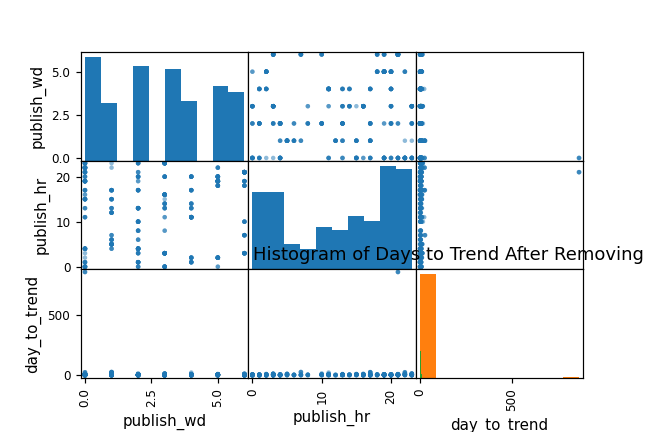

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_data[['publish_wd', 'publish_hr', 'day_to_trend']])
plt.show()
plt.hist(new_data['day_to_trend'])
plt.title("Histogram of Original Days to Trend")
plt.show()

new_data = new_data.loc[new_data.day_to_trend <= 14]
plt.hist(new_data['day_to_trend'])
plt.title("Histogram of Days to Trend After Removing values > 7")
plt.show()

From the histograms of the numerical variables in our dataset, we can see that none of them follow Gaussian distribution. The Number of views seem to follow exponential/gamma distribution, and the target variable seems to only cluster at two locations. This suggest that we may need to discard the few observations, and lets narrow down to videos that become trending within two weeks.

Secondly, scatter plots indicate that an **OLS Linear regression will not be a sufficient model**. This is the reason why we should try using more complex learning algorithms like random forest and Xgboost

# Random Forest Algorithm

**we will use Random forest classifier to predict if the trending days are less than a week**

In [15]:
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
new_data.day_to_trend = new_data.day_to_trend <= 7

In [16]:
def rf_model(X, y, my_pg = None):
    #perform Grid-search
    if my_pg is None:
        #the followings are hyperparameters to optimize:max depth of a tree and number of trees in the forest
        my_pg={
            'max_depth': range(6,10),
            'n_estimators': range(155,170),
            }
        
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid = my_pg,cv=5, scoring='accuracy', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X,y)
    
    return grid_result.best_params_,grid_result.best_score_

In [17]:
X = new_data[['views', 'likes', 'dislikes', 'publish_wd', 'publish_hr']]
y = new_data['day_to_trend']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4,test_size=.3)

In [18]:
print(rf_model(X_train,y_train)) #({'max_depth':9, 'n_estimators': 165}, 0.895050301818652)

({'max_depth': 9, 'n_estimators': 159}, 0.8950503018108652)


In [20]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(max_depth = 9, n_estimators = 165, oob_score = True, warm_start = True)
rfc.fit(X_train, y_train)
#OOB Score(Out of Bag)
print(rfc.oob_score_) #0.8640226628895185
print(rfc.score(X_test,y_test)) # 0.9210526315789473
print(rfc.feature_importances_)
#print(pd.crosstab(pd.Series(y_train, name='Actual'), pd.Series(rfc.predict(X_train),name='predicted')))
print(pd.crosstab(pd.Series(y_test,name='Actual'), pd.Series(rfc.predict(X_test), name='predicted')))
pred = rfc.predict(X_test)
print(classification_report(y_test, pred))

0.8725212464589235
0.9144736842105263
[0.26648525 0.28516689 0.26660977 0.06216752 0.11957057]
predicted  False  True 
Actual                 
False          1      3
True           7     32
              precision    recall  f1-score   support

       False       1.00      0.66      0.79        38
        True       0.90      1.00      0.95       114

    accuracy                           0.91       152
   macro avg       0.95      0.83      0.87       152
weighted avg       0.92      0.91      0.91       152



<IPython.core.display.Javascript object>


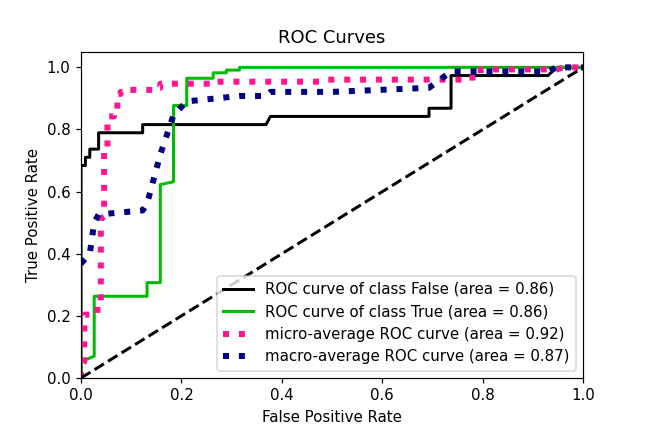

<IPython.core.display.Javascript object>


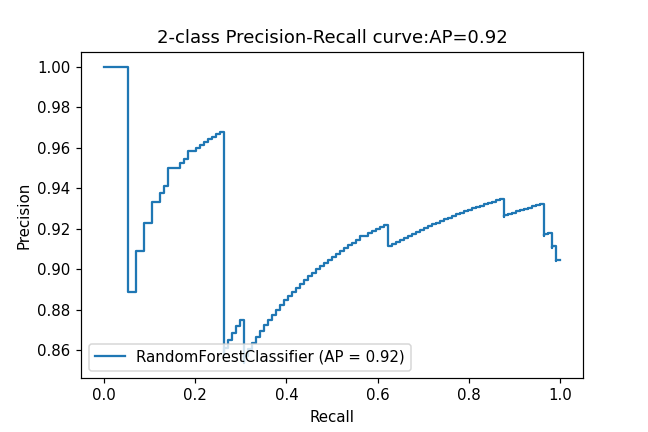

The f1 score for this model is 0.9495798319327731


In [28]:
import scikitplot as skplt
from sklearn.metrics import average_precision_score, plot_precision_recall_curve
prob = rfc.predict_proba(X_test)
myplot = skplt.metrics.plot_roc(y_test, prob)
average_precision = average_precision_score(y_test, prob[:,1]) #prob[:,1] is the estimated probability of positive outcome
disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:'
                  'AP={0:0.2f}'.format(average_precision))
score = metrics.f1_score(np.array(y_test),pred)
print('The f1 score for this model is {}'.format(score))

# Comments:
* with the Random forest algorithm, we obtained the parameter estimates that can predict whether or not a video can be trend within a week with 90.05% accuracy for the training dataset and 88.5% for the testing dataset. 
* Since Random Forest Algorithm uses a stochastic process to yield a model, what we obtain each time from fitting it to the data will be different. 
* The feature importances indicate that whether or not the comment/rating section is available does not seem to affect the chance of getting on the trend within one week.
* It also reveals that the most three important factors are number of views, likes, dislikes.we will try fitting the model again without these two variables.

Also, since we are interested in both true positive and true negative guesses and since we have a some imbalances between two classes(whether a video gets on the trend within one week),we first use ROC Curve to check the performance on both of the two classes. The ROC-AUC of both classes is about 92%

Let's say, we only want to focus on how good we predict the positive class(or when the positive case is rare in the data). The Precision-Recall curve should be used instead. The PR-AUC is 96%, meaning that the model seems to predict very well for the positive class. Another way to look at this is using F1 score whose formula is 

This score gives a balance between the precision and recall values. Using this score avoids misleading information from either precision or recall values in certain cases(e.g. data imbalance). Our Model F1 is about .95

# XGboost Algorithm

## we will use Xgboost classifier to predict if the trending day is less than a week

In [24]:
from xgboost import XGBClassifier
parameters = [{'n_estimators':range(100,150,1)},
             {'learning_rate':np.arange(0.01,1.0,0.01)}]
gbm = XGBClassifier(max_features='sqrt', subsample=0.8, random_state=10)
grid_search = GridSearchCV(estimator = gbm, param_grid = parameters, scoring='accuracy', cv=4, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)

#grid_search.cv_results_
#grid_search.best_params_, grid_search.best_score_
grid_search.best_estimator_

[15:18:48] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.24000000000000002, max_delta_step=0, max_depth=6,
              max_features='sqrt', min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [26]:
gbm = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
                   colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                   importance_type='gain', interaction_contraints=None,
                   Learning_rate=0.24, max_delta_step=0, max_depth=6,
                   max_features='sqrt', min_child_weight=1, missing=None,
                   monotone_constraints=None, n_estimators=100, n_jobs=0,
                   num_parallel_tree=1, objective='binary:logistic',random_state=10,
                   reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
                   tree_method=None, validate_parameters=False, verbosity=None)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
print(classification_report(y_test, y_pred))

[15:26:58] WARNING: /workspace/src/learner.cc:480: 
Parameters: { Learning_rate, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Predicted  False  True 
Actual                 
False          1      3
True          11     28
              precision    recall  f1-score   support

       False       0.83      0.76      0.79        38
        True       0.92      0.95      0.94       114

    accuracy                           0.90       152
   macro avg       0.88      0.86      0.86       152
weighted avg       0.90      0.90      0.90       152



# Comments:
It seems that the XGboost using random forest performs very similarly to the random forest model. However it took a longer time to train the original random forest model. Again, our models are not capable of giving legitimate predictions, because we asssumed that the number of views, dislikes, and likes are the values at the time these videos become trending, which is not true. When the appropriate data become available, we can be more confident about our results. Also, we should consider using thumbnail pictures as a feaure in predicting days to trend target. However, this would be a big project by itself and need contributions from more people

Import required libraries for NLP

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def dd(data,bgcolor,title):
    plt.figure(figsize=(100,100))
    dd = WordCloud(background_color = bgcolor, max_words = 1000, max_font_size=50)
    dd.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [13]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import requests

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df['title'] for r in v)

#cat function to concatenate strings and print standard output
a = df['title'].str.lower().str.cat(sep='')

#Remove the punctuation, numbers and return list of words
b = re.sub('[^A-Za-z]+', '',a)

#Remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

KeyboardInterrupt: 

In [ ]:
#Remove characters which have length less than 2
without_single_char = [word for word in filtered_sentence if len(word)>2]

#Remove numbers
cleaned_data_title = [word for word in without_single_char if not word.isnumeric()]

**Counting the frequency of words in Title**

In [ ]:
#Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt.head(8))

**WordCloud for Title Column**

In [ ]:
dd(cleaned_data_title,'black','Common Words')


To Count the frequency of words in Tags Column.

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#"Convert list of list into text"
#a=''.join(str(r) for v in df['title'] for r in v)

tags_lower = df['tags'].str.lower().str.cat(sep='')

#removes punctuation, numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', '', tags_lower)

#removes all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_token_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)
        
#Remove characters which have length less than 2
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags)>2]

#Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]

#Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N), columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt_tags.head(7))

Word cloud for Tags

In [ ]:
dd(cleaned_data_tags, 'black', 'Common Words')

To Count the Frequency of words in Description Column.

In [ ]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#"Convert list of list into text"
#a=''.join(str(r) for v in df['title'] for r in v)

desc_lower = df['tags'].str.lower().str.cat(sep='')

#removes punctuation, numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', '', desc_lower)

#removes all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

#Remove characters which have length less than 2
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

#Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]

#Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_tags.most_common(top_N), columns=['Word', 'Frequency'])



plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency",data=rslt_desc.head(7))

WordCloud for Description column

In [ ]:
dd(cleaned_data_desc, 'black', 'Frequent Words')

Categorize the Description column into Positive and Negative sentiments using TextBlob

In [ ]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_desc = df['description'].astype(str)
for row in df_usa_desc:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns=['sentence', 'sentiment', 'polarity'])
    
def f(df_usa_polarity_desc): 
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

Categorize the Tags columns into positive and negative sentiments using TextBlob

In [ ]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags = df['tags']
for row in df_usa_tags:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns=['sentence', 'sentiment', 'polarity'])
    
def f(df_usa_polarity_tags): 
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

Categorize the Title columns into positive and negative sentiments using TextBlob

In [ ]:
from textblob import TextBlob

bloblist_desc = list()

df_usa_desc = df['title'].astype(str)
for row in df_usa_title:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns=['sentence', 'sentiment', 'polarity'])
    
def f(df_usa_polarity_title): 
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)

Which video took maximum no of days to be a Trending video

Now, the below script will calculate the no. of days taken by a video to be a Trending video. The graph will show the top 5videos that took maximum no. of days to be a trending video

**Ratio of Youtube Trending videos in 5 countries**
since we have combined statistics from multiple countries, it's good to have a look on the number and ratio of videos we have in different countries. In this plot we keep only last entry for duplicated videos. That's why we can clearly observe that the country with the most long-trending video endup having lesser videos

In [ ]:
labels = df.groupby(['country'])